## Business Objective: 
To create a Chat bot to provide a seamless response to Data Science interview questions with an appropriate answer, by mining from the web.

# Table of Content

* __Step 1: Data collection through web scrapping__

* __Step 2: Importing the Relevant Libraries__
    
* __Step 3: Data Inspection__
    
* __Step 4: Text Preprocessing__
        
* __Step 5: Feature identification__
    
* __Step 6: Model Building & Testing__

* __Step 7: Model Deployment__


#### Step 1- webscrapping file is attached seperately

### Step 2: Importing the Relevant Libraries

In [ ]:
#Basic Libraries
import pandas as pd 
import numpy as np
import re
import numpy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# For NLP & Preprocessing

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from wordcloud import WordCloud,STOPWORDS #Better stopwords here
import unicodedata

In [ ]:
#Visualizations

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#Setting Dark Theme
sns.set(rc={'figure.figsize':(10,6.18)})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [ ]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()


In [ ]:
# Model Building
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

### Step 2: Data Inspection

#### Individually analysing the selected topics using word cloud & ngrams 

In [ ]:
# Topic : Ensembled learning 

In [ ]:
df = pd.read_excel("C:/Users/anoop/Downloads/upload/Project/Rawdata's/el_raw.xlsx")

In [ ]:
df.head()

,Questions,Answers
0,What is Ensemble Learning?,Ensemble learning methods is a machine learnin...
1,What are the Simple Ensemble Techniques?,"the Simple Ensemble Techniques are Max Voting,..."
2,What is Max voting?,The max voting method is generally used for cl...
3,What is Voting classifiers?,Voting classifiers are usually used in classif...
4,What is Averaging ?,weighted average method uses multiple predict...


In [ ]:
df.info() #no null values are visible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  28 non-null     object
 1   Answers    28 non-null     object
dtypes: object(2)
memory usage: 576.0+ bytes


In [ ]:
df.shape #There are 22 records

(28, 2)

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Duplicate value check
df.drop_duplicates(inplace=True)
df.reset_index()
df.shape

(28, 2)

In [ ]:
df.head()

,Questions,Answers
0,What is Ensemble Learning?,Ensemble learning methods is a machine learnin...
1,What are the Simple Ensemble Techniques?,"the Simple Ensemble Techniques are Max Voting,..."
2,What is Max voting?,The max voting method is generally used for cl...
3,What is Voting classifiers?,Voting classifiers are usually used in classif...
4,What is Averaging ?,weighted average method uses multiple predict...


In [ ]:
df.head()

,Questions,Answers
0,What is Ensemble Learning?,Ensemble learning methods is a machine learnin...
1,What are the Simple Ensemble Techniques?,"the Simple Ensemble Techniques are Max Voting,..."
2,What is Max voting?,The max voting method is generally used for cl...
3,What is Voting classifiers?,Voting classifiers are usually used in classif...
4,What is Averaging ?,weighted average method uses multiple predict...


In [ ]:
df1 = df.copy()

In [ ]:
df1

,Questions,Answers
0,What is Ensemble Learning?,Ensemble learning methods is a machine learnin...
1,What are the Simple Ensemble Techniques?,"the Simple Ensemble Techniques are Max Voting,..."
2,What is Max voting?,The max voting method is generally used for cl...
3,What is Voting classifiers?,Voting classifiers are usually used in classif...
4,What is Averaging ?,weighted average method uses multiple predict...
5,What is Weighted Average ?,Weighted average is an extension of the avera...
6,What are the Advanced Ensemble Techniques,"the Advanced Ensemble Techniques are Stacking,..."
7,What is Stacking ?,Stacking is an ensemble learning technique tha...
8,Blending ?,Blending uses only a holdout (validation) set ...
9,Bagging ?,bagging is combining the results of multiple ...


### Step 4: Text Preprocessing-1.1

In [ ]:
# cleaning the data using RegEx function
def cleantext(text):
    text = re.sub(r"\n", " ", str(text)) #remove next "\n"
    text = re.sub(r"[\d-]", "", str(text)) #remove all digits 
    text = re.sub(r'[^A-Za-z0-9]+', " ", str(text)) #remove all special charcters
    text = text.lower()
    return text

In [ ]:
df1

,Questions,Answers
0,What is Ensemble Learning?,Ensemble learning methods is a machine learnin...
1,What are the Simple Ensemble Techniques?,"the Simple Ensemble Techniques are Max Voting,..."
2,What is Max voting?,The max voting method is generally used for cl...
3,What is Voting classifiers?,Voting classifiers are usually used in classif...
4,What is Averaging ?,weighted average method uses multiple predict...
5,What is Weighted Average ?,Weighted average is an extension of the avera...
6,What are the Advanced Ensemble Techniques,"the Advanced Ensemble Techniques are Stacking,..."
7,What is Stacking ?,Stacking is an ensemble learning technique tha...
8,Blending ?,Blending uses only a holdout (validation) set ...
9,Bagging ?,bagging is combining the results of multiple ...


In [ ]:
#Apply to questions
df1.Questions = df1.Questions.apply(cleantext)
df1.Questions.head()

0                  what is ensemble learning 
1    what are the simple ensemble techniques 
2                         what is max voting 
3                 what is voting classifiers 
4                          what is averaging 
Name: Questions, dtype: object

In [ ]:
#Apply to answers
df1.Answers = df1.Answers.apply(cleantext)
df1.Answers.head()

0    ensemble learning methods is a machine learnin...
1    the simple ensemble techniques are max voting ...
2    the max voting method is generally used for cl...
3    voting classifiers are usually used in classif...
4    weighted average method uses multiple predicti...
Name: Answers, dtype: object

In [ ]:
# Frequency of words, custom stop word removal& word cloud
# Making a corpus of the dataset
review_str = ' '.join(df1.Answers.tolist())

In [ ]:
text = review_str
words = text.split()
fdsit = FreqDist(words)
print(fdsit)
print(fdsit.most_common(100))
#Words which are not in inbuilt stopwords are noted

<FreqDist with 275 samples and 785 outcomes>
[('the', 47), ('in', 20), ('is', 19), ('a', 18), ('are', 18), ('used', 17), ('of', 16), ('to', 15), ('for', 15), ('boosting', 13), ('and', 11), ('model', 10), ('predictions', 10), ('different', 10), ('bagging', 10), ('learning', 9), ('models', 9), ('max', 8), ('algorithm', 8), ('ensemble', 7), ('each', 7), ('parameters', 7), ('that', 6), ('problems', 6), ('technique', 6), ('from', 6), ('an', 6), ('gradient', 6), ('min', 6), ('machine', 5), ('method', 5), ('base', 5), ('it', 5), ('classification', 5), ('multiple', 5), ('as', 5), ('regression', 5), ('random', 5), ('forest', 5), ('uses', 5), ('algorithms', 5), ('gbm', 5), ('estimators', 5), ('n', 5), ('leaf', 5), ('average', 4), ('this', 4), ('make', 4), ('data', 4), ('which', 4), ('or', 4), ('other', 4), ('decision', 4), ('set', 4), ('trees', 4), ('adaboost', 4), ('xgboost', 4), ('samples', 4), ('combining', 3), ('techniques', 3), ('voting', 3), ('weighted', 3), ('by', 3), ('we', 3), ('predict

In [ ]:
# Custom Stop Words list
# We made a custom stopwords set specific to our current dataset
with open("me_stopwords.txt","r") as stop:
  custom_stop = set(stop.read().split("\n"))

In [ ]:
# We can create a new stopwords list by mergeing WordCLoud's STOPWORDS and our custom_stop
custom_stop = custom_stop.union(STOPWORDS)
len(custom_stop)

211

In [ ]:
df1.Answers = df1.Answers.apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stop]))
df1.Answers

0     ensemble learning methods machine learning met...
1     simple ensemble techniques max voting avearge ...
2     max voting method generally classification pro...
3     voting classifiers usually classification prob...
4     weighted average method uses multiple predicti...
5     weighted average extension averaging method mo...
6     advanced ensemble techniques stacking blending...
7     stacking ensemble learning technique uses pred...
8     blending uses holdout validation set train set...
9     bagging combining results multiple models inst...
10    bootstrapping sampling technique create subset...
11    boosting sequential process subsequent attempt...
12    different bagging boosting algorithms bagging ...
13    different boosting algorithms adaboost gbm xgb...
14    bagging metaestimator ensembling algorithm cla...
15    random forest another ensemble machine learnin...
16    adaptive boosting adaboost simplest boosting a...
17    gradient boosting gbm another ensemble mac

In [ ]:
#making a corpus of the dataset after custom stop word removal
review_str2 = ' '.join(df1.Answers.tolist())

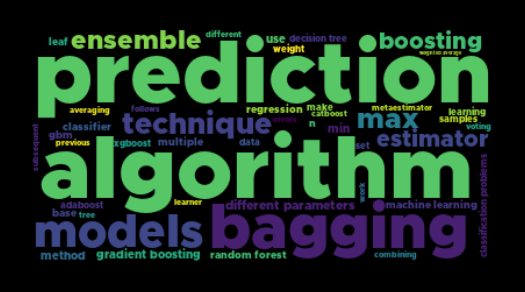

In [ ]:
#Creating a WordCloud
font_path = 'Metropolis-Black.otf'
wordcloud_ip = WordCloud(
                      background_color="black", max_words=500,font_path=font_path,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(review_str2)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

#Words which have no emotional meaning are noted and added to our custom stopword list

In [ ]:
# lemmatization & ngrams

In [ ]:
def fine_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = custom_stop
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
words = fine_clean(''.join(str(df1['Answers'].tolist())))

In [ ]:
# bigram

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:25]

(different, parameter)       7
(gradient, boosting)         6
(machine, learning)          5
(random, forest)             5
(classification, problem)    4
(boosting, algorithm)        4
(decision, tree)             4
(base, estimator)            3
(weighted, average)          3
(n, estimator)               3
(bagging, metaestimator)     3
(learning, algorithm)        3
(multiple, model)            3
(make, prediction)           3
(min, sample)                3
(ensemble, machine)          2
(data, point)                2
(boosting, technique)        2
(another, ensemble)          2
(making, prediction)         2
(leaf, different)            2
(learning, method)           2
(averaging, method)          2
(sample, leaf)               2
(algorithm, work)            2
dtype: int64

<AxesSubplot:>

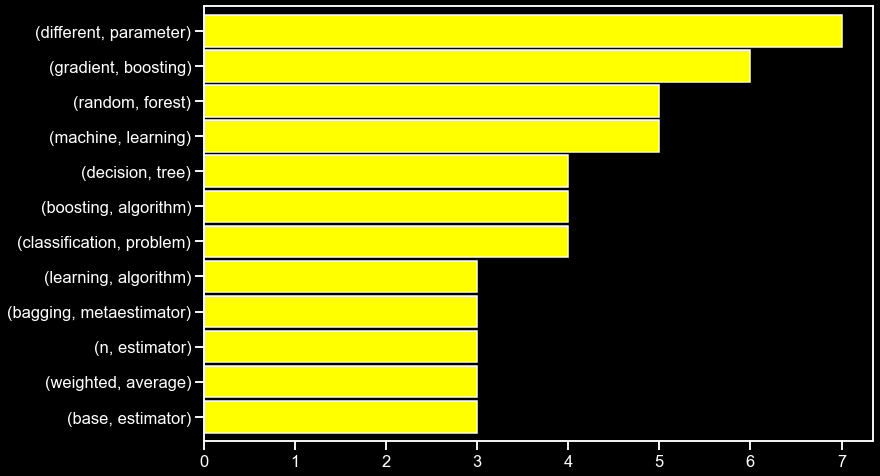

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
bigrams_series.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8))

In [ ]:
# Trigram

In [ ]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(machine, learning, algorithm)    3
(base, estimator, n)              2
(n, job, different)               2
(ensemble, machine, learning)     2
(leaf, different, parameter)      2
(another, ensemble, machine)      2
(job, different, parameter)       2
(estimator, n, estimator)         2
(min, sample, leaf)               2
(averaging, method, model)        1
dtype: int64

In [ ]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

<AxesSubplot:>

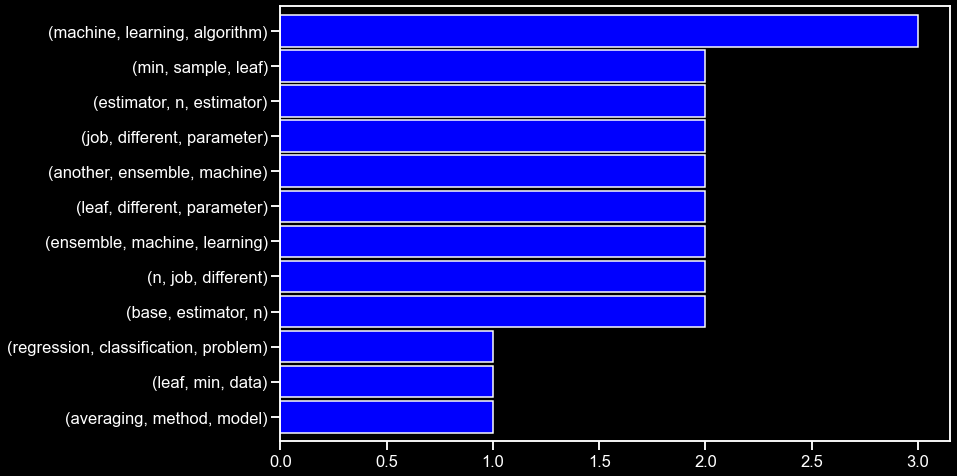

In [ ]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [ ]:
# Topic : Model evaluation 

In [ ]:
df2 = pd.read_excel("C:/Users/anoop/Downloads/Chatbot_final/topicwisewordcloud/me_raw.xlsx")

In [ ]:
df2.info() #no null values are visible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  25 non-null     object
 1   Answers    25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes


In [ ]:
df.shape #There are 22 records

(28, 2)

In [ ]:
df2.dropna(inplace=True)

In [ ]:
# Duplicate value check
df2.drop_duplicates(inplace=True)
df2.reset_index()
df2.shape

(25, 2)

In [ ]:
df2.head()

,Questions,Answers
0,Cross-Validation,Cross-validation is a technique that involves ...
1,k-fold cross-validation,"In k-fold cross-validation, we divide the data..."
2,Model Evaluation Metrics,Model evaluation metrics are required to quant...
3,Classification Accuracy,classification Accuracy is a common evaluation...
4,Logarithmic Loss,Logarithmic loss (logloss) measures the perfor...


In [ ]:
df3 = df2.copy()

### Step 4: Text Preprocessing-1.2

In [ ]:
#Apply to questions
df3.Questions = df3.Questions.apply(cleantext)
df3.Questions.head()

0             crossvalidation
1       kfold crossvalidation
2    model evaluation metrics
3     classification accuracy
4            logarithmic loss
Name: Questions, dtype: object

In [ ]:
#Apply to answers
df3.Answers = df3.Answers.apply(cleantext)
df3.Answers.head()

0    crossvalidation is a technique that involves p...
1    in kfold crossvalidation we divide the dataset...
2    model evaluation metrics are required to quant...
3    classification accuracy is a common evaluation...
4    logarithmic loss logloss measures the performa...
Name: Answers, dtype: object

In [ ]:
# Frequency of words, custom stop word removal& word cloud
# Making a corpus of the dataset
review_str = ' '.join(df3.Answers.tolist())

In [ ]:
text = review_str
words = text.split()
fdsit = FreqDist(words)
print(fdsit)
print(fdsit.most_common(100))
#Words which are not in inbuilt stopwords are noted

<FreqDist with 347 samples and 1057 outcomes>
[('the', 105), ('of', 49), ('is', 44), ('a', 28), ('to', 26), ('and', 25), ('it', 18), ('as', 16), ('used', 15), ('model', 14), ('that', 12), ('for', 12), ('values', 9), ('performance', 8), ('learning', 8), ('classification', 8), ('measure', 8), ('error', 8), ('can', 8), ('in', 7), ('are', 7), ('on', 7), ('machine', 7), ('number', 7), ('by', 7), ('be', 7), ('you', 7), ('regression', 6), ('between', 6), ('predicted', 6), ('test', 6), ('precision', 6), ('data', 6), ('dataset', 5), ('evaluate', 5), ('k', 5), ('loss', 5), ('value', 5), ('actual', 5), ('positive', 5), ('recall', 5), ('mean', 5), ('squared', 5), ('or', 5), ('target', 5), ('variables', 5), ('when', 5), ('we', 4), ('parts', 4), ('this', 4), ('metrics', 4), ('such', 4), ('metric', 4), ('all', 4), ('positives', 4), ('defined', 4), ('which', 4), ('will', 4), ('true', 4), ('has', 4), ('crossvalidation', 3), ('into', 3), ('training', 3), ('an', 3), ('one', 3), ('evaluation', 3), ('model

In [ ]:
# Custom Stop Words list
# We made a custom stopwords set specific to our current dataset
with open("me_stopwords.txt","r") as stop:
  custom_stop = set(stop.read().split("\n"))

In [ ]:
custom_stop = custom_stop.union(STOPWORDS)
len(custom_stop)

211

In [ ]:
df3.Answers = df3.Answers.apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stop]))
df3.Answers

0     crossvalidation technique involves partitionin...
1     kfold crossvalidation divide dataset equal par...
2     evaluation metrics required quantify performan...
3     classification accuracy common evaluation metr...
4     logarithmic loss logloss measures performance ...
5     area roc curve performance metric measuring ab...
6     fmeasure fscore measure s accuracy considers p...
7     mean absolute error difference actual predicted s
8     mean squared error commonly known mse average ...
9     rsquared statistical measure represent goodnes...
10    adjusted rsquared quite different rsquared tak...
11    confusion matrix n n matrix evaluate performan...
12    precision ratio true positives positives preci...
13    fscore determined harmonic mean precision reca...
14    auc area curve roc receiver characteristic ope...
15    confidence interval ci range required meet cer...
16    gini coefficient gini index popular metric imb...
17    predictive power synthetic metric satisfie

In [ ]:
review_str2 = ' '.join(df3.Answers.tolist())

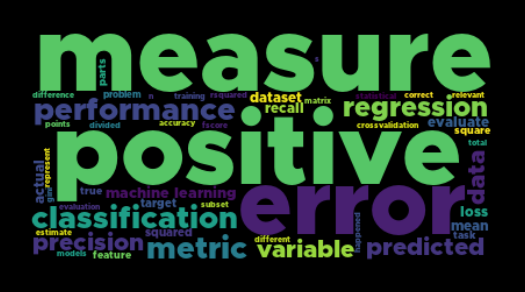

In [ ]:
#Creating a WordCloud
font_path = 'Metropolis-Black.otf'
wordcloud_ip = WordCloud(
                      background_color="black", max_words=500,font_path=font_path,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(review_str2)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

#Words which have no emotional meaning are noted and added to our custom stopword list

In [ ]:
# lemmatization & ngrams

In [ ]:
words = fine_clean(''.join(str(df3['Answers'].tolist())))

In [ ]:
# bigram

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:25]

(machine, learning)              6
(squared, error)                 4
(mean, squared)                  3
(classification, regression)     3
(target, variable)               3
(data, point)                    3
(evaluation, metric)             3
(prediction, made)               3
(predictive, power)              3
(performance, measure)           3
(positive, result)               2
(matrix, evaluate)               2
(true, positive)                 2
(error, loss)                    2
(null, hypothesis)               2
(actual, target)                 2
(precision, recall)              2
(feature, subset)                2
(relevant, data)                 2
(loss, function)                 2
(performance, classification)    2
(log, loss)                      2
(supervised, learning)           2
(task, classification)           2
(represents, feature)            2
dtype: int64

<AxesSubplot:>

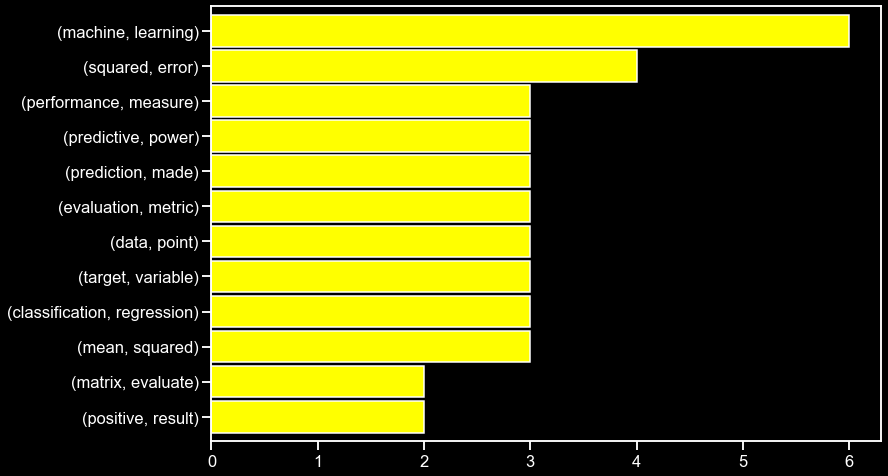

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
bigrams_series.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8))

In [ ]:
# Trigram

In [ ]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(error, occurs, null)               2
(squared, error, loss)              2
(occurs, null, hypothesis)          2
(correct, positive, result)         2
(average, squared, error)           2
(mean, squared, error)              2
(function, least, square)           2
(learning, task, classification)    2
(loss, function, least)             2
(least, square, regression)         2
dtype: int64

In [ ]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

<AxesSubplot:>

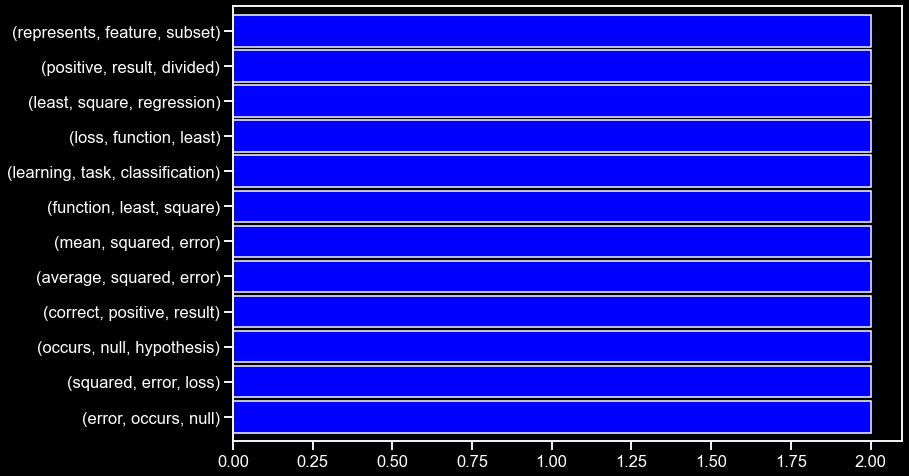

In [ ]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [ ]:
# NLP ensembled learning & ngram

In [ ]:
df4 = pd.read_csv("C:/Users/anoop/Downloads/Chatbot_final/topicwisewordcloud/nlp_raw.csv")

In [ ]:
df4.head()

,questions,answers
0,1. What is the NLG (Natural Language Generation)?,Natural Language Generation is a part of AI an...
1,2. What is the order of steps in natural langu...,The order of steps that are to be followed in ...
2,3. What is signal processing in NLP?,Signal processing is a method that enables sof...
3,4. What is pragmatic analysis in NLP?,The pragmatic analysis is the process of infor...
4,5. What is syntactic analysis in NLP?,"The syntactic analysis, also referred to as pa..."


In [ ]:
df4.info() #No null values are visible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   questions  77 non-null     object
 1   answers    77 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [ ]:
df4.shape #There are 78 records

(78, 2)

In [ ]:
df4.dropna(inplace=True)

In [ ]:
# Duplicate value check
df4.drop_duplicates(inplace=True)
df4.reset_index()
df4.shape

(76, 2)

In [ ]:
df4.head()

,questions,answers
0,1. What is the NLG (Natural Language Generation)?,Natural Language Generation is a part of AI an...
1,2. What is the order of steps in natural langu...,The order of steps that are to be followed in ...
2,3. What is signal processing in NLP?,Signal processing is a method that enables sof...
3,4. What is pragmatic analysis in NLP?,The pragmatic analysis is the process of infor...
4,5. What is syntactic analysis in NLP?,"The syntactic analysis, also referred to as pa..."


In [ ]:
df5 = df4.copy()

### Step 4: Text Preprocessing-1.3

In [ ]:
#Apply to questions
df5.questions = df5.questions.apply(cleantext)
df5.questions.head()

0         what is the nlg natural language generation 
1     what is the order of steps in natural languag...
2                    what is signal processing in nlp 
3                   what is pragmatic analysis in nlp 
4                   what is syntactic analysis in nlp 
Name: questions, dtype: object

In [ ]:
#Apply to answers
df5.answers = df5.answers.apply(cleantext)
df5.answers.head()

0    natural language generation is a part of ai an...
1    the order of steps that are to be followed in ...
2    signal processing is a method that enables sof...
3    the pragmatic analysis is the process of infor...
4    the syntactic analysis also referred to as par...
Name: answers, dtype: object

In [ ]:
# Frequency of words, custom stop word removal& word cloud
# Making a corpus of the dataset
review_str = ' '.join(df5.answers.tolist())

In [ ]:
text = review_str
words = text.split()
fdsit = FreqDist(words)
print(fdsit)
print(fdsit.most_common(100))
#Words which are not in inbuilt stopwords are noted

<FreqDist with 558 samples and 1955 outcomes>
[('the', 142), ('of', 97), ('is', 91), ('to', 66), ('a', 63), ('and', 45), ('in', 37), ('it', 33), ('text', 31), ('used', 26), ('are', 26), ('words', 26), ('can', 22), ('nlp', 20), ('process', 20), ('language', 18), ('that', 18), ('as', 17), ('for', 17), ('from', 14), ('or', 14), ('word', 14), ('an', 13), ('be', 13), ('parsing', 13), ('by', 13), ('natural', 12), ('analysis', 11), ('between', 11), ('on', 10), ('method', 9), ('also', 9), ('information', 8), ('similarity', 8), ('data', 7), ('given', 7), ('we', 7), ('semantic', 7), ('parts', 7), ('i', 7), ('e', 7), ('different', 7), ('into', 7), ('form', 6), ('processing', 6), ('speech', 6), ('modeling', 6), ('sentences', 6), ('document', 6), ('corpus', 6), ('sequence', 6), ('learning', 6), ('find', 6), ('their', 6), ('difference', 6), ('vectors', 6), ('regular', 6), ('where', 5), ('set', 5), ('meaning', 5), ('structure', 5), ('referred', 5), ('techniques', 5), ('sentence', 5), ('most', 5), ('m

In [ ]:
# Custom Stop Words list
# We made a custom stopwords set specific to our current dataset
with open("nlp_stopwords.txt","r") as stop:
  custom_stop = set(stop.read().split("\n"))

In [ ]:
custom_stop = custom_stop.union(STOPWORDS)
len(custom_stop)

205

In [ ]:
df5.answers = df5.answers.apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stop]))
df5.answers

0     natural language generation part ai generates ...
1     order steps followed natural language understa...
2     signal processing method enables software anal...
3     pragmatic analysis information extraction set ...
4     syntactic analysis referred parsing syntax ana...
                            ...                        
72    conditional random fields crfs collection stat...
73    hidden markov random fields derivation hidden ...
74    coreference resolution collecting expressions ...
75    probably approximately correct learning mathem...
76    sequence learning method learning input output...
Name: answers, Length: 76, dtype: object

In [ ]:
review_str2 = ' '.join(df5.answers.tolist())

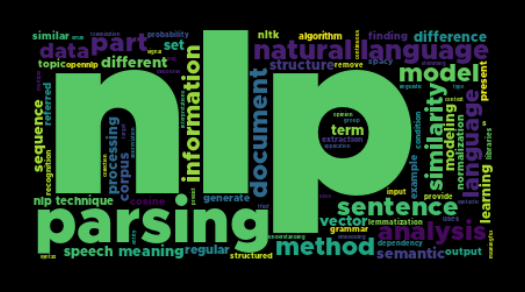

In [ ]:
#Creating a WordCloud
font_path = 'Metropolis-Black.otf'
wordcloud_ip = WordCloud(
                      background_color="black", max_words=500,font_path=font_path,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(review_str2)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

#Words which have no emotional meaning are noted and added to our custom stopword list

In [ ]:
# lemmatization & ngrams

In [ ]:
words = fine_clean(''.join(str(df5['answers'].tolist())))

In [ ]:
# bigram

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:25]

(natural, language)          12
(nlp, technique)              6
(part, speech)                4
(cosine, similarity)          3
(finding, cosine)             3
(shallow, parsing)            3
(dependency, parsing)         3
(string, matching)            3
(information, extraction)     3
(modeling, method)            3
(similarity, nlp)             3
(similar, term)               2
(parsing, method)             2
(technique, remove)           2
(type, normalization)         2
(present, sentence)           2
(language, toolkit)           2
(document, irrespective)      2
(topic, modeling)             2
(popular, library)            2
(small, part)                 2
(relationship, different)     2
(latent, semantic)            2
(library, natural)            2
(structured, data)            2
dtype: int64

<AxesSubplot:>

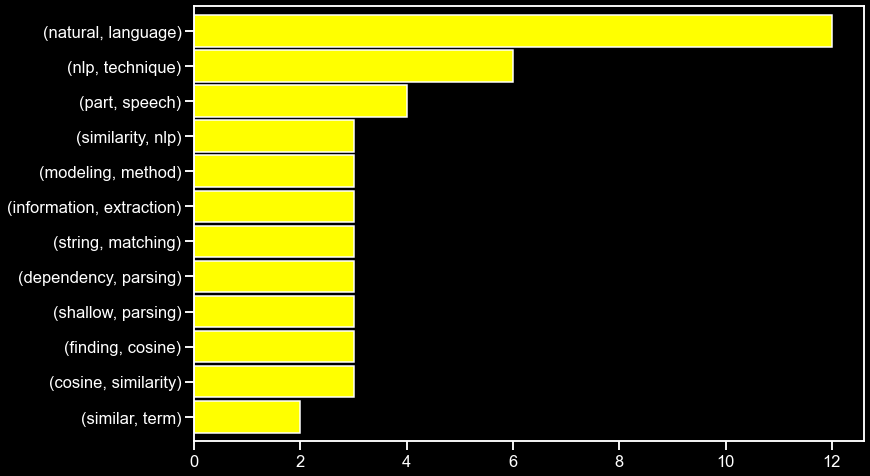

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
bigrams_series.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8))

In [ ]:
# Trigram

In [ ]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(library, natural, language)             2
(nlp, technique, remove)                 2
(topic, modeling, method)                2
(natural, language, text)                2
(inner, product, space)                  2
(natural, language, toolkit)             2
(condition, multiple, interpretation)    2
(continuous, bag, model)                 2
(natural, language, processing)          2
(referred, condition, multiple)          2
dtype: int64

In [ ]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

<AxesSubplot:>

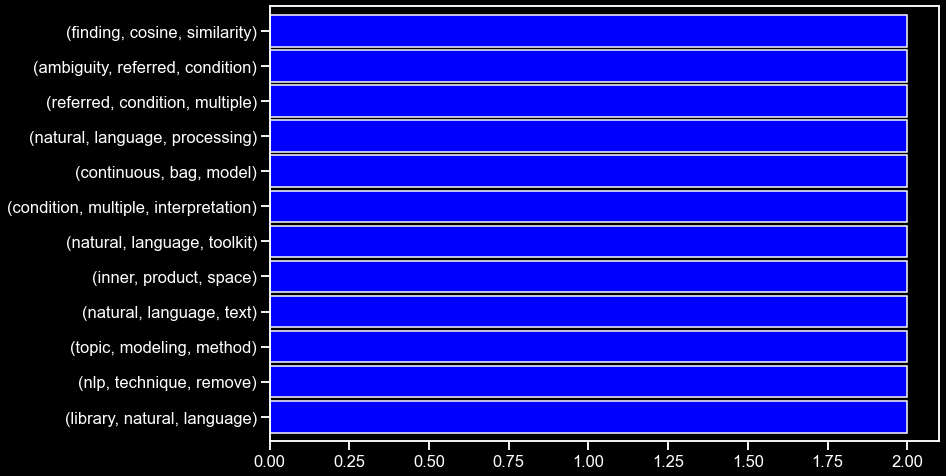

In [ ]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [ ]:
# Machine Laerning word cloud & ngram

In [ ]:
df6 = pd.read_csv("C:/Users/anoop/Downloads/Chatbot_final/topicwisewordcloud/ml_raw.csv")

In [ ]:
df6.head()

,Unnamed: 0,topic,questions,answers
0,1,Machine Learning,2. What are Different Types of Machine Learnin...,different types of machine learning algorithms...
1,2,Machine Learning,3. What is Supervised Learning?,Supervised learning is a machine learning algo...
2,3,Machine Learning,4. What is Unsupervised Learning?,Unsupervised learning is also a type of machin...
3,4,Machine Learning,5. What is ‘Naive’ in a Naive Bayes?,The Naive Bayes method is a supervised learnin...
4,5,Machine Learning,6. What is PCA? When do you use it?,Principal component analysis (PCA) is most com...


In [ ]:
df6.info() #no null values are visible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  22 non-null     int64 
 1   topic       22 non-null     object
 2   questions   22 non-null     object
 3   answers     22 non-null     object
dtypes: int64(1), object(3)
memory usage: 832.0+ bytes


In [ ]:
df6.shape #There are 22 records

(22, 4)

In [ ]:
df6.dropna(inplace=True)

In [ ]:
# Duplicate value check
df6.drop_duplicates(inplace=True)
df6.reset_index()
df6.shape

(22, 4)

In [ ]:
df6.head()

,Unnamed: 0,topic,questions,answers
0,1,Machine Learning,2. What are Different Types of Machine Learnin...,different types of machine learning algorithms...
1,2,Machine Learning,3. What is Supervised Learning?,Supervised learning is a machine learning algo...
2,3,Machine Learning,4. What is Unsupervised Learning?,Unsupervised learning is also a type of machin...
3,4,Machine Learning,5. What is ‘Naive’ in a Naive Bayes?,The Naive Bayes method is a supervised learnin...
4,5,Machine Learning,6. What is PCA? When do you use it?,Principal component analysis (PCA) is most com...


In [ ]:
# Removing unwanted features
df6.drop(['Unnamed: 0', 'topic'],axis=1,inplace=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   questions  22 non-null     object
 1   answers    22 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes


In [ ]:
df6.head()

,questions,answers
0,2. What are Different Types of Machine Learnin...,different types of machine learning algorithms...
1,3. What is Supervised Learning?,Supervised learning is a machine learning algo...
2,4. What is Unsupervised Learning?,Unsupervised learning is also a type of machin...
3,5. What is ‘Naive’ in a Naive Bayes?,The Naive Bayes method is a supervised learnin...
4,6. What is PCA? When do you use it?,Principal component analysis (PCA) is most com...


In [ ]:
df7 = df6.copy()

In [ ]:
df7

,questions,answers
0,2. What are Different Types of Machine Learnin...,different types of machine learning algorithms...
1,3. What is Supervised Learning?,Supervised learning is a machine learning algo...
2,4. What is Unsupervised Learning?,Unsupervised learning is also a type of machin...
3,5. What is ‘Naive’ in a Naive Bayes?,The Naive Bayes method is a supervised learnin...
4,6. What is PCA? When do you use it?,Principal component analysis (PCA) is most com...
5,8. What are Support Vectors in SVM?,A Support Vector Machine (SVM) is an algorithm...
6,9. What are Different Kernels in SVM?,"There are six types of kernels in SVM,Linear k..."
7,10. What is Cross-Validation?,Cross-validation is a method of splitting all ...
8,11. What is Bias in Machine Learning?,Bias in data tells us there is inconsistency i...
9,12. Explain the Difference Between Classificat...,difference between classification and regressi...


### Step 4: Text Preprocessing-1.4

In [ ]:
#Apply to questions
df7.questions = df7.questions.apply(cleantext)
df7.questions.head()

0     what are different types of machine learning ...
1                         what is supervised learning 
2                       what is unsupervised learning 
3                      what is naive in a naive bayes 
4                      what is pca when do you use it 
Name: questions, dtype: object

In [ ]:
#Apply to answers
df7.answers = df7.answers.apply(cleantext)
df7.answers.head()

0    different types of machine learning algorithms...
1    supervised learning is a machine learning algo...
2    unsupervised learning is also a type of machin...
3    the naive bayes method is a supervised learnin...
4    principal component analysis pca is most commo...
Name: answers, dtype: object

In [ ]:
# Frequency of words, custom stop word removal& word cloud
# Making a corpus of the dataset
review_str = ' '.join(df7.answers.tolist())

In [ ]:
text = review_str
words = text.split()
fdsit = FreqDist(words)
print(fdsit)
print(fdsit.most_common(100))
#Words which are not in inbuilt stopwords are noted

<FreqDist with 301 samples and 632 outcomes>
[('the', 37), ('is', 29), ('a', 21), ('to', 18), ('of', 17), ('data', 15), ('in', 13), ('are', 12), ('and', 11), ('for', 11), ('learning', 10), ('used', 9), ('that', 8), ('it', 7), ('between', 6), ('machine', 5), ('or', 5), ('we', 5), ('algorithm', 4), ('from', 4), ('on', 4), ('predict', 4), ('this', 4), ('when', 4), ('kernel', 4), ('into', 4), ('supervised', 3), ('function', 3), ('training', 3), ('given', 3), ('have', 3), ('method', 3), ('each', 3), ('other', 3), ('pca', 3), ('there', 3), ('an', 3), ('classes', 3), ('model', 3), ('classification', 3), ('regression', 3), ('whereas', 3), ('clustering', 3), ('correlation', 3), ('two', 3), ('variables', 3), ('different', 2), ('types', 2), ('unsupervised', 2), ('reinforcement', 2), ('also', 2), ('find', 2), ('patterns', 2), ('set', 2), ('variable', 2), ('naive', 2), ('bayes', 2), ('by', 2), ('all', 2), ('case', 2), ('measures', 2), ('linear', 2), ('svm', 2), ('tries', 2), ('line', 2), ('way', 2)

In [ ]:
# Custom Stop Words list
# We made a custom stopwords set specific to our current dataset
with open("ml_stopwords.txt","r") as stop:
  custom_stop = set(stop.read().split("\n"))

In [ ]:
custom_stop = custom_stop.union(STOPWORDS)
len(custom_stop)

210

In [ ]:
df7.answers = df7.answers.apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stop]))
df7.answers

0     machine learning algorithms supervised unsuper...
1     supervised learning machine learning algorithm...
2     unsupervised learning machine learning algorit...
3     naive bayes supervised learning algorithm naiv...
4     principal component analysis pca commonly dime...
5     support vector machine svm algorithm fit line ...
6     six kernels svm linear kernel polynomial kerne...
7     crossvalidation splitting three parts training...
8     bias tells us inconsistency inconsistency may ...
9     difference classification regression classific...
10    overfitting means fitted training well underfi...
11    simplified human brain much brain neurons acti...
12    calculating loss consider single point term lo...
13    outlier observation dataset far away observati...
14    random forest versatile machine learning capab...
15    collaborative filtering proven technique perso...
16    clustering process grouping set objects groups...
17    recommendation engine system predict users

In [ ]:
review_str2 = ' '.join(df7.answers.tolist())

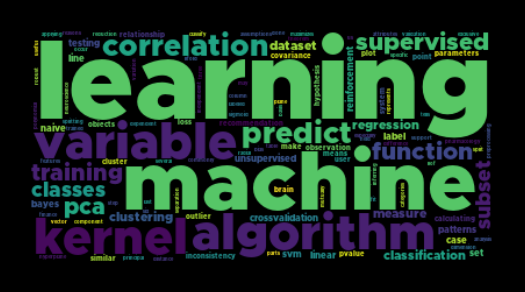

In [ ]:
#Creating a WordCloud
font_path = 'Metropolis-Black.otf'
wordcloud_ip = WordCloud(
                      background_color="black", max_words=500,font_path=font_path,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(review_str2)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

#Words which have no emotional meaning are noted and added to our custom stopword list

In [ ]:
# lemmatization & ngrams

In [ ]:
words = fine_clean(''.join(str(df7['answers'].tolist())))

In [ ]:
# bigram

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:25]

(learning, algorithm)           4
(machine, learning)             4
(supervised, learning)          2
(observation, dataset)          2
(reinforcement, learning)       2
(learning, machine)             2
(regression, classification)    2
(cost, function)                1
(make, decision)                1
(another, within)               1
(grouping, set)                 1
(pvalues, make)                 1
(naive, make)                   1
(radial, basis)                 1
(case, pca)                     1
(kernel, crossvalidation)       1
(process, grouping)             1
(variable, column)              1
(represents, overfitting)       1
(set, object)                   1
(significant, level)            1
(classification, regression)    1
(human, brain)                  1
(robust, separation)            1
(difference, classification)    1
dtype: int64

<AxesSubplot:>

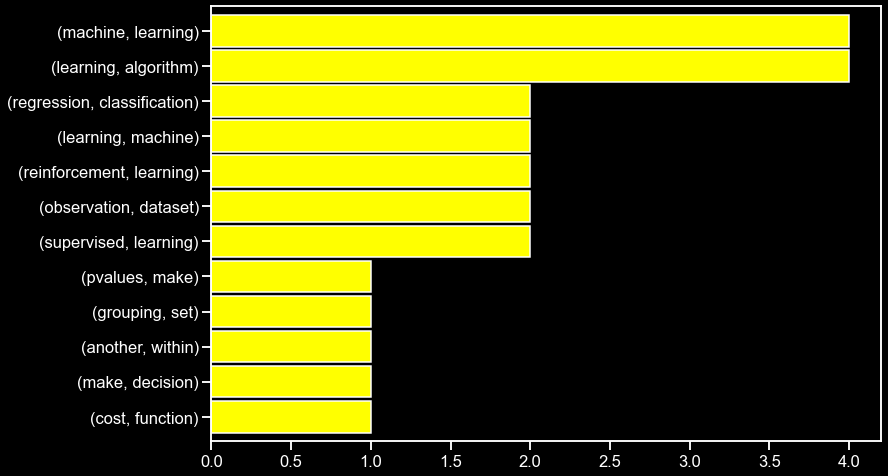

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
bigrams_series.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8))

In [ ]:
# Trigram

In [ ]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(machine, learning, algorithm)          3
(learning, machine, learning)           2
(point, class, robust)                  1
(object, group, object)                 1
(etc, random, forest)                   1
(variable, label, predict)              1
(clustering, recommendation, engine)    1
(class, six, kernel)                    1
(covariance, hard, compare)             1
(observation, dataset, tool)            1
dtype: int64

In [ ]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

<AxesSubplot:>

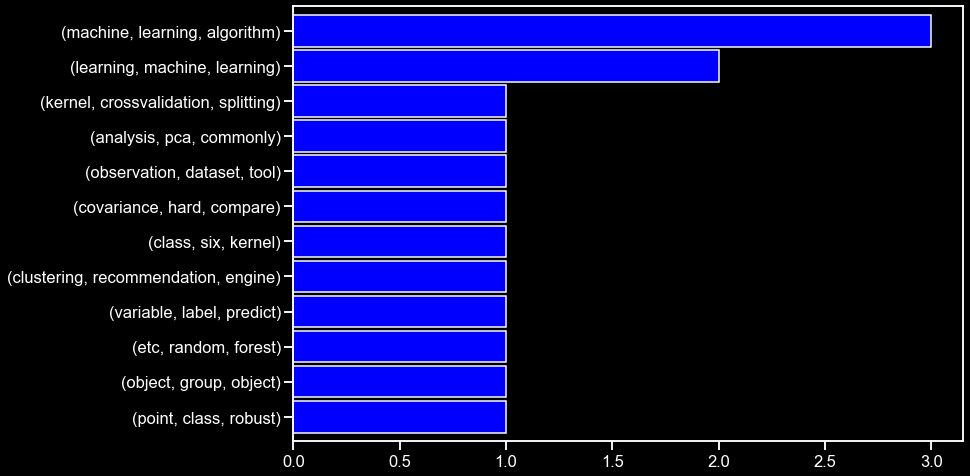

In [ ]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [ ]:
# Data Science word cloud & ngram

In [ ]:
df8 = pd.read_csv("C:/Users/anoop/Downloads/Chatbot_final/topicwisewordcloud/Ds_raw.csv")

In [ ]:
df8.head()

,Unnamed: 0,topic,questions,answers
0,0,Data Science,1) What is Machine learning?,Machine learning is a branch of computer scien...
1,1,Data Science,2) Mention the difference between Data Mining ...,"Machine learning relates with the study, desig..."
2,2,Data Science,3) What is ‘Overfitting’ in Machine learning?,"In machine learning, when a statistical model ..."
3,3,Data Science,4) Why overfitting happens?,The possibility of overfitting exists as the c...
4,4,Data Science,5) How can you avoid overfitting ?,"In this technique, a model is usually given a..."


In [ ]:
df8.info() #no null values are visible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  38 non-null     int64 
 1   topic       38 non-null     object
 2   questions   38 non-null     object
 3   answers     38 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB


In [ ]:
df8.shape #There are 22 records

(38, 4)

In [ ]:
df8.dropna(inplace=True)

In [ ]:
# Duplicate value check
df8.drop_duplicates(inplace=True)
df8.reset_index()
df8.shape

(38, 4)

In [ ]:
df8.head()

,Unnamed: 0,topic,questions,answers
0,0,Data Science,1) What is Machine learning?,Machine learning is a branch of computer scien...
1,1,Data Science,2) Mention the difference between Data Mining ...,"Machine learning relates with the study, desig..."
2,2,Data Science,3) What is ‘Overfitting’ in Machine learning?,"In machine learning, when a statistical model ..."
3,3,Data Science,4) Why overfitting happens?,The possibility of overfitting exists as the c...
4,4,Data Science,5) How can you avoid overfitting ?,"In this technique, a model is usually given a..."


In [ ]:
# Removing unwanted features
df8.drop(['Unnamed: 0', 'topic'],axis=1,inplace=True)
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   questions  38 non-null     object
 1   answers    38 non-null     object
dtypes: object(2)
memory usage: 912.0+ bytes


In [ ]:
df8.head()

,questions,answers
0,1) What is Machine learning?,Machine learning is a branch of computer scien...
1,2) Mention the difference between Data Mining ...,"Machine learning relates with the study, desig..."
2,3) What is ‘Overfitting’ in Machine learning?,"In machine learning, when a statistical model ..."
3,4) Why overfitting happens?,The possibility of overfitting exists as the c...
4,5) How can you avoid overfitting ?,"In this technique, a model is usually given a..."


In [ ]:
df9 = df8.copy()

In [ ]:
df9

,questions,answers
0,1) What is Machine learning?,Machine learning is a branch of computer scien...
1,2) Mention the difference between Data Mining ...,"Machine learning relates with the study, desig..."
2,3) What is ‘Overfitting’ in Machine learning?,"In machine learning, when a statistical model ..."
3,4) Why overfitting happens?,The possibility of overfitting exists as the c...
4,5) How can you avoid overfitting ?,"In this technique, a model is usually given a..."
5,6) What is inductive machine learning?,The inductive machine learning involves the pr...
6,10) What is the standard approach to supervise...,The standard approach to supervised learning i...
7,11) What is ‘Training set’ and ‘Test set’?,In various areas of information science like m...
8,17) What is the difference between artificial ...,Machine learning in where mathematical foundat...
9,18) What is classifier in machine learning?,Designing and developing algorithms according ...


### Step 4: Text Preprocessing-1.5

In [ ]:
#Apply to questions
df9.questions = df9.questions.apply(cleantext)
df9.questions.head()

0                            what is machine learning 
1     mention the difference between data mining an...
2             what is overfitting in machine learning 
3                             why overfitting happens 
4                       how can you avoid overfitting 
Name: questions, dtype: object

In [ ]:
#Apply to answers
df9.answers = df9.answers.apply(cleantext)
df9.answers.head()

0    machine learning is a branch of computer scien...
1    machine learning relates with the study design...
2    in machine learning when a statistical model d...
3    the possibility of overfitting exists as the c...
4    in this technique a model is usually given a d...
Name: answers, dtype: object

In [ ]:
# Frequency of words, custom stop word removal& word cloud
# Making a corpus of the dataset
review_str = ' '.join(df9.answers.tolist())

In [ ]:
text = review_str
words = text.split()
fdsit = FreqDist(words)
print(fdsit)
print(fdsit.most_common(100))
#Words which are not in inbuilt stopwords are noted

<FreqDist with 394 samples and 1133 outcomes>
[('the', 79), ('of', 47), ('is', 43), ('a', 43), ('learning', 40), ('to', 27), ('and', 23), ('data', 19), ('in', 18), ('set', 17), ('machine', 16), ('are', 15), ('used', 15), ('model', 15), ('for', 11), ('as', 11), ('training', 11), ('that', 10), ('or', 10), ('algorithm', 10), ('from', 9), ('which', 8), ('on', 8), ('process', 8), ('can', 7), ('it', 7), ('with', 6), ('based', 6), ('classifier', 6), ('ensemble', 6), ('algorithms', 5), ('while', 5), ('known', 5), ('test', 5), ('supervised', 5), ('an', 5), ('models', 5), ('techniques', 5), ('classification', 5), ('component', 5), ('method', 5), ('programming', 4), ('learn', 4), ('be', 4), ('when', 4), ('statistical', 4), ('overfitting', 4), ('number', 4), ('dataset', 4), ('by', 4), ('where', 4), ('independent', 4), ('feature', 4), ('two', 4), ('methods', 4), ('function', 4), ('analysis', 4), ('system', 3), ('improve', 3), ('example', 3), ('they', 3), ('knowledge', 3), ('this', 3), ('relationshi

In [ ]:
with open("ds_stopwords.txt","r") as stop:
  custom_stop = set(stop.read().split("\n"))

In [ ]:
custom_stop = custom_stop.union(STOPWORDS)
len(custom_stop)

218

In [ ]:
df9.answers = df9.answers.apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stop]))
df9.answers

0     machine learning branch computer science deals...
1     machine learning relates study design developm...
2     machine learning statistical describes random ...
3     possibility overfitting exists criteria traini...
4     technique usually given training training run ...
5     inductive machine learning involves learning o...
6     standard approach supervised learning split tr...
7     various areas information science machine lear...
8     machine learning mathematical foundations inde...
9     designing developing algorithms according beha...
10    classifier machine learning inputs vector disc...
11    na ve bayes classifier will converge quicker d...
12    genetic programming one techniques machine lea...
13    inductive logic programming ilp subfield machi...
14    selecting mathematical describe selection sele...
15    predicting good probabilities supervised learn...
16    sufficient isotonic regression prevent overfit...
17    difference heuristics decision trees evalu

In [ ]:
review_str2 = ' '.join(df9.answers.tolist())

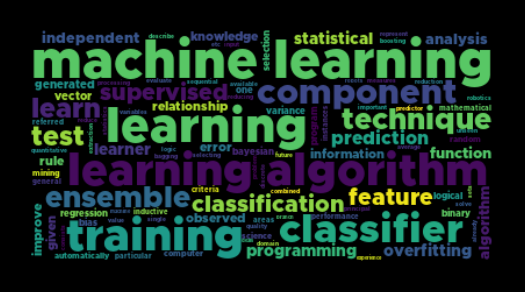

In [ ]:
#Creating a WordCloud
font_path = 'Metropolis-Black.otf'
wordcloud_ip = WordCloud(
                      background_color="black", max_words=500,font_path=font_path,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(review_str2)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

#Words which have no emotional meaning are noted and added to our custom stopword list

In [ ]:
# lemmatization & ngrams

In [ ]:
words = fine_clean(''.join(str(df9['answers'].tolist())))

In [ ]:
# bigram

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:25]

(machine, learning)         16
(learning, algorithm)       11
(supervised, learning)       5
(ensemble, learning)         3
(component, analysis)        3
(analysis, important)        2
(training, training)         2
(feature, extraction)        2
(algorithm, referred)        2
(binary, classifier)         2
(principal, component)       2
(logical, manner)            1
(describes, random)          1
(technique, solve)           1
(criterion, training)        1
(combine, prediction)        1
(analysis, ica)              1
(efficacy, technique)        1
(statistical, describes)     1
(phase, inductive)           1
(selection, feature)         1
(training, main)             1
(give, computer)             1
(important, component)       1
(learning, statistic)        1
dtype: int64

<AxesSubplot:>

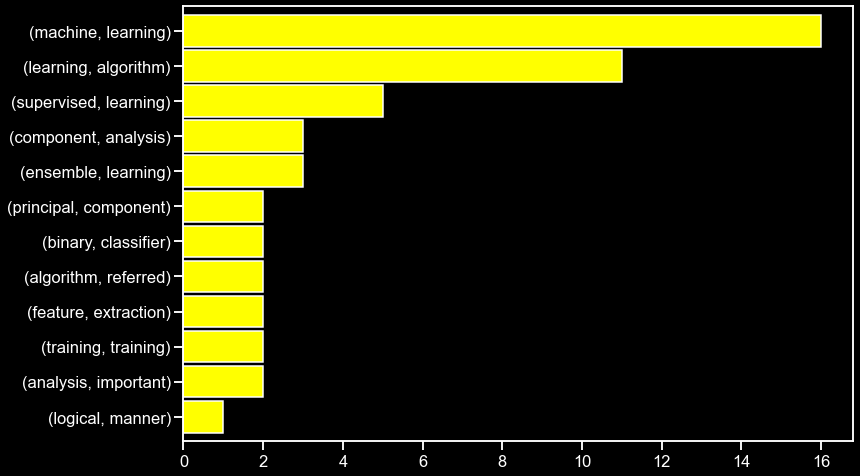

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
bigrams_series.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8))

In [ ]:
# Trigram

In [ ]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(learning, algorithm, referred)      2
(supervised, learning, algorithm)    2
(principal, component, analysis)     2
(type, exhibit, poor)                1
(machine, learning, mathematical)    1
(discrete, value, class)             1
(extract, knowledge, interesting)    1
(rule, standard, approach)           1
(problem, area, robotics)            1
(efficacy, technique, usually)       1
dtype: int64

In [ ]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

<AxesSubplot:>

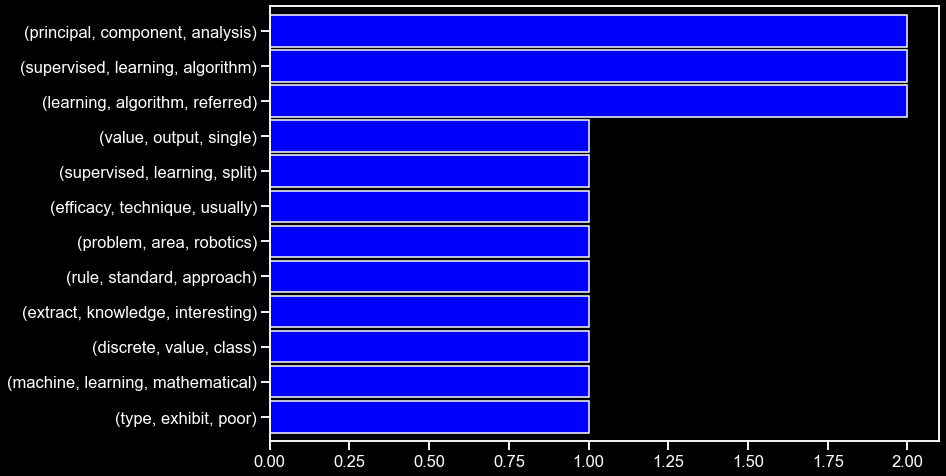

In [ ]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

### Step 5: Feature Matching

In [ ]:
# Based on wordcloud,ngrams and detailed analysis of answers, the keywords are labelled manually from each answers

In [ ]:
df10 = pd.read_csv("datavalidation.csv")

In [ ]:
df10.head()

,Keywords,Answers
0,ensemble learning,ensemble learning methods is a machine learnin...
1,simple ensemble techniques,the simple ensemble techniques are max voting ...
2,max voting,the max voting method is generally used for cl...
3,voting classifiers,voting classifiers are usually used in classif...
4,weighted average,weighted average is an extension of the averag...


In [ ]:
df10.shape

(143, 2)

In [ ]:
# Checking for dupilcates after the topics concatenation
df10.drop_duplicates(subset = 'Keywords', inplace=True)
df10.isna().sum()
df10.reset_index(drop=True, inplace=True)

In [ ]:
# Using defined reg exp cleaning the data
df10.Answers = df10.Answers.apply(cleantext)
df10.Answers.head()

0    ensemble learning methods is a machine learnin...
1    the simple ensemble techniques are max voting ...
2    the max voting method is generally used for cl...
3    voting classifiers are usually used in classif...
4    weighted average is an extension of the averag...
Name: Answers, dtype: object

In [ ]:
df10.Keywords = df10.Keywords.apply(cleantext)
df10.Keywords.head()

0             ensemble learning
1    simple ensemble techniques
2                    max voting
3            voting classifiers
4              weighted average
Name: Keywords, dtype: object

In [ ]:
df10.head()

,Keywords,Answers
0,ensemble learning,ensemble learning methods is a machine learnin...
1,simple ensemble techniques,the simple ensemble techniques are max voting ...
2,max voting,the max voting method is generally used for cl...
3,voting classifiers,voting classifiers are usually used in classif...
4,weighted average,weighted average is an extension of the averag...


In [ ]:
df11 = df10.copy()

In [ ]:
# removing the stopwords

In [ ]:
df11.Keywords = df11.Keywords.apply(lambda x: ' '.join([word for word in x.split() if word not in STOPWORDS]))
df11

,Keywords,Answers
0,ensemble learning,ensemble learning methods is a machine learnin...
1,simple ensemble techniques,the simple ensemble techniques are max voting ...
2,max voting,the max voting method is generally used for cl...
3,voting classifiers,voting classifiers are usually used in classif...
4,weighted average,weighted average is an extension of the averag...
...,...,...
138,perceptron machine learning,perceptron is a supervised learning algorithm ...
139,components bayesian logic program,bayesian logic program consists of two compone...
140,instance based learning algorithm sometimes re...,instance based learning algorithm is also refe...
141,incremental learning,incremental learning method is the ability of ...


In [ ]:
df11.shape

(143, 2)

In [ ]:
# With the help of label encoder creating the index of keywords as suffix

In [ ]:
# Encode labels in column 'Keywords' for cretaing index
df11['Keywords_sorted']= label_encoder.fit_transform(df11['Keywords'])

In [ ]:
df11.head()

,Keywords,Answers,Keywords_sorted
0,ensemble learning,ensemble learning methods is a machine learnin...,46
1,simple ensemble techniques,the simple ensemble techniques are max voting ...,114
2,max voting,the max voting method is generally used for cl...,69
3,voting classifiers,voting classifiers are usually used in classif...,136
4,weighted average,weighted average is an extension of the averag...,137


In [ ]:
# sorting index value

In [ ]:
df12 = df11.sort_values('Keywords_sorted')
df12.reset_index(drop=True, inplace = True)
df12

,Keywords,Answers,Keywords_sorted
0,adaboost,adaptive boosting or adaboost is one of the si...,0
1,adjusted rsquared,adjusted rsquared is quite different from rsqu...,1
2,advanced ensemble techniques,the advanced ensemble techniques are stacking ...,2
3,ambiguity,ambiguity can be referred to as a condition wh...,3
4,area curve auc,area under roc curve is a performance metric f...,4
...,...,...,...
138,word embedding,word embedding is the process of mapping words...,138
139,word similarity,word similarity in nlp is done by calculating ...,139
140,wordnet,wordnet can be described as a database created...,140
141,wordvec,wordvec is a collection of models that are use...,141


In [ ]:
df12["keywords_final"] = df12["Keywords"] + " " + df12["Keywords_sorted"].astype(str)
df12.head()

,Keywords,Answers,Keywords_sorted,keywords_final
0,adaboost,adaptive boosting or adaboost is one of the si...,0,adaboost 0
1,adjusted rsquared,adjusted rsquared is quite different from rsqu...,1,adjusted rsquared 1
2,advanced ensemble techniques,the advanced ensemble techniques are stacking ...,2,advanced ensemble techniques 2
3,ambiguity,ambiguity can be referred to as a condition wh...,3,ambiguity 3
4,area curve auc,area under roc curve is a performance metric f...,4,area curve auc 4


In [ ]:
# saving the answers to the variable final_ans

In [ ]:
final_ans = df12.Answers

In [ ]:
# final_ans.to_csv("final_ans.txt", index = False, header = False, index_label=False)

In [ ]:
df12.drop(['Keywords','Answers','Keywords_sorted'], axis = 1, inplace = True)

In [ ]:
# saving the keywords final to a text fie for further processing

In [ ]:
# df12.to_csv("final_quest.txt", index = False, header = False, index_label=False)
# Remove the first row from final quest & final_ans for correcting the label

### Step 6: Model Building

In [ ]:
labels = []
questions = []
for line in open('final_quest.txt', encoding="utf8"):
    labels.append(line.strip().split(" ")[-1])
    questions.append(" ".join(line.strip().split(" ")[:-1]))
answers = []
for line in open('final_ans.txt', encoding="utf8"):
    answers.append(line.strip())

In [ ]:
questions

['adjusted rsquared',
 'advanced ensemble techniques',
 'ambiguity',
 'area curve auc',
 'bag words model',
 'bagging',
 'bagging metaestimator',
 'bias',
 'blending',
 'boosting',
 'bootstrapping',
 'catboost',
 'cbow',
 'classification accuracy',
 'classification algorithms',
 'clustering',
 'collaborative filtering',
 'components bayesian logic program',
 'conditional random fields',
 'confidence interval',
 'confusion matrix',
 'contentbased filtering',
 'coreference resolution',
 'corpus',
 'correlation',
 'correlation analysis',
 'cosine similarity',
 'cost functions',
 'covariance',
 'crossvalidation',
 'dependency parsing',
 'difference heuristic rule learning heuristics decision trees',
 'difference regular expression regular grammar',
 'different parameters used adaboost',
 'different parameters used bagging metaestimator',
 'different parameters used catboost',
 'different parameters used gradient boosting',
 'different parameters used light gbm',
 'different parameters used

In [ ]:
labels

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '13

In [ ]:
answers

['adjusted rsquared is quite different from rsquared as it takes into account the number of independent variables that are used for predicting the target variable in this way one can determine if the addition of these new variables will actually increase the model fit or not',
 'the advanced ensemble techniques are stacking blending bagging boosting',
 'ambiguity can be referred to as a condition when a word can have multiple interpretations and results in being misunderstood natural languages are ambiguous and can make it difficult to process nlp techniques on them resulting in the wrong output',
 'area under roc curve is a performance metric for measuring the ability of a binary classifier to discriminate between positive and negative classes',
 'the bagofwords model is used for information retrieval here the text is represented as a multiset i e a bag of words we don t consider grammar and word order but we surely maintain the multiplicity',
 'bagging is combining the results of mul

### Model Architecture
* __Using bag of words concept converted the keywords into vectors__.
* __By naïve bayes algorithm classified the keywords with respect to the answers index labels__
* __Based on the user response classifying the input vector into respective label index and appending the answer based on the index__


In [1]:
bow_vectorizer = CountVectorizer(stop_words = STOPWORDS,lowercase = True, ngram_range = (1,2))
training_vectors = bow_vectorizer.fit_transform(questions)

NameError: ignored

In [ ]:
classifier = MultinomialNB()
classifier.fit(training_vectors, labels)

In [ ]:
class ChatBot:
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
  def start_chat(self):
    user_response = input("Hi, I'm a chatbot trained on Data science Interview questions!!\n")
    self.chat(user_response)
  
  def chat(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")
    return
  
  def generate_response(self, sentence):
    input_vector = bow_vectorizer.transform([sentence])
    predict = classifier.predict(input_vector)
    index = int(predict[0])
    print("Accurate:",str(classifier.predict_proba(input_vector)[0][index-1] * 100)[:5] + "%")
    return answers[index-1]
  
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("Ok, have a great day!")
        return True
    return False

### Model testing

In [ ]:
datascience_interview_bot = ChatBot()
datascience_interview_bot.start_chat()

KeyboardInterrupt: Interrupted by user

### Step 7: Model deployemnt file using flask is attached seperately